In [1]:
# Final Project physics 140
# Created by Peter Nguyen 
# Prompt: Use reinforced learning and the bellman equation to train an agent to solve mazes.

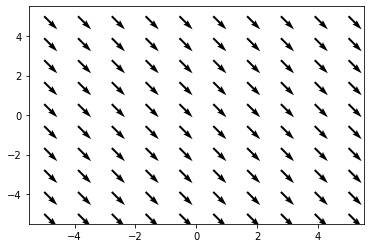

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 1
v = -1

plt.quiver(x,y,u,v)
plt.show()

In [3]:
load_q = np.loadtxt('realQ')
print(load_q)
load_orig = load_q.reshape(3, 3, 4)
print(load_orig)

[[  2.   0.  16.   0.   0.   3.  18.   0.   0.   0.   0.   0.]
 [ 17.   0.  39.   4.  48.  10. -28.   2.   0.  17.  76.   0.]
 [ 63.   0.   0.  16.  90.  36.   0.  14.   0.   0.   0.   0.]]
[[[  2.   0.  16.   0.]
  [  0.   3.  18.   0.]
  [  0.   0.   0.   0.]]

 [[ 17.   0.  39.   4.]
  [ 48.  10. -28.   2.]
  [  0.  17.  76.   0.]]

 [[ 63.   0.   0.  16.]
  [ 90.  36.   0.  14.]
  [  0.   0.   0.   0.]]]


[0 1 2]
0 0 16.1245154965971
0 1 18.24828759089466
0 2 0.0
1 0 38.91015291668744
1 1 48.41487374764082
1 2 77.87810988975015
2 0 65.0
2 1 55.78530272392541
2 2 0.0
[16.1245154965971, 18.24828759089466, 0.0, 38.91015291668744, 48.41487374764082, 77.87810988975015, 65.0, 55.78530272392541, 0.0]
[[0.  1.5 3. ]
 [0.  1.5 3. ]
 [0.  1.5 3. ]]
[[0.  0.  0. ]
 [1.5 1.5 1.5]
 [3.  3.  3. ]]
[2.0, -3.0, 0.0, 17.0, 38.0, -17.0, 63.0, 54.0, 0.0]
[16.0, 18.0, 0.0, 35.0, -30.0, 76.0, -16.0, -14.0, 0.0]


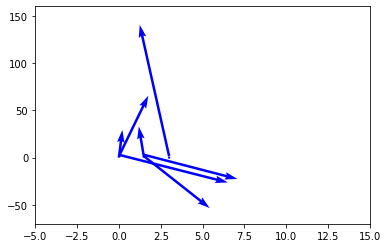

In [49]:
values = list()
U = list()
V = list()
X = np.arange(0,3)
Y = np.arange(0,3)

print(X)
for x in range(3):
    for y in range(3):
        values.append(np.sqrt((load_orig[x,y,0]-load_orig[x,y,1])**2+(load_orig[x,y,2]-load_orig[x,y,3])**2))
        print(x,y,np.sqrt((load_orig[x,y,0]-load_orig[x,y,1])**2+(load_orig[x,y,2]-load_orig[x,y,3])**2))
        U.append(load_orig[x,y,0]-load_orig[x,y,1])
        V.append(load_orig[x,y,2]-load_orig[x,y,3])


X,Y = np.meshgrid(np.linspace(0,3,3),np.linspace(0,3,3))

print(values)
print(X)
print(Y)
print(U)
print(V)

plt.xlim(-5,15)
plt.ylim(-70,160)
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
plt.show()

[16.1245154965971, 18.24828759089466, 0.0, 38.91015291668744, 48.41487374764082, 77.87810988975015, 65.0, 55.78530272392541, 0.0]
[[0.  1.5 3. ]
 [0.  1.5 3. ]
 [0.  1.5 3. ]]
[[0.  0.  0. ]
 [1.5 1.5 1.5]
 [3.  3.  3. ]]
[[  2.  -3.   0.]
 [ 17.  38. -17.]
 [ 63.  54.   0.]]
[[ 16.  18.   0.]
 [ 35. -30.  76.]
 [-16. -14.   0.]]


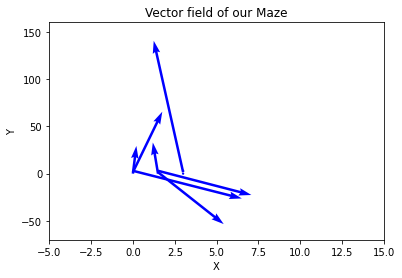

In [56]:
#values = list()
#U = list()
#V = list()
X = np.arange(0,3)
Y = np.arange(0,3)


X,Y = np.meshgrid(np.linspace(0,3,3),np.linspace(0,3,3))

x_shape = X.shape

U = np.zeros(x_shape)
V = np.zeros(x_shape)
k = 0

for i in range(x_shape[0]):
    for j in range(x_shape[1]):
        U[i,j] = load_orig[i,j,0]-load_orig[i,j,1]
        V[i,j] = load_orig[i,j,2]-load_orig[i,j,3]
        
print(values)
print(X)
print(Y)
print(U)
print(V)

plt.xlabel("X")
plt.ylabel("Y")

plt.title("Vector field of our Maze")
plt.xlim(-5,15)
plt.ylim(-70,160)
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1)
plt.show()

In [62]:
%%time
for i in range(10):
    print(5)

5
5
5
5
5
5
5
5
5
5
Wall time: 984 µs


Text(0.5, 1.0, 'Run times of each Epsilon Setting')

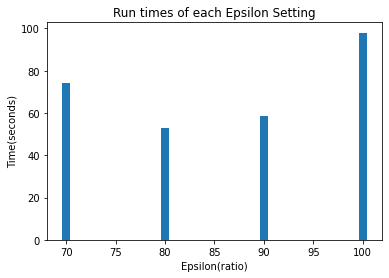

In [72]:
epsilon = [70,80,90,100]
time = [74,52.7,58.8,98]
plt.bar(x,time)
plt.xlabel("Epsilon(ratio)")
plt.ylabel("Time(seconds)")
plt.title("Run times of each Epsilon Setting")